<a href="https://colab.research.google.com/github/norrilsk/GraphCourse/blob/main/lectures/Graph_Course_lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Алгоритмы на графах. Занятие № 1


## Определения


(https://habr.com/ru/companies/otus/articles/568026/)

(https://habr.com/ru/companies/otus/articles/675730/)

Пусть $V$ - непустое множество, $V^{(2)}$ - множество всех его двухэлементных подмножеств. Пара $(V,E)$, где $E$ - произвольное подмножество подмножество множества $V^{(2)}$, называется **неориентированным графом**. Элементы множества $V$ называются **вершинами**, а элементы множества $E$ - ребрами.
$$G = (V,E)$$

количество вершин и ребер обозначается как $|V|$ и $|E|$ соответственно


 При описании времени работы алгоритма над графом $G = (V,E)$
 Мы определяем размер входного графа в терминах количества вершин $|V|$ и количества ребер $|E|$ . Для удобства и краткости ассимпотических обозначений, и только в них, символ $|V|$ будем записывать как $V$, а количество ребер $|E|$ как $E$. Таким образом записью $O(VE)$ мы будем обозначать запись $O(|V||E|)$

Пусть $e = \{u,v\} $- ребро графа $G$, вершины $u$ и $v$  называют **концами** ребра $e$

Вершнины $u$,$v$ графа $G$ называются **смежными**, если множество $\{u,v\}$ является ребром графа $G$

Вершина $v$ и ребро $e$ называются **инцидентными**, если $v$ является концом ребра $e$




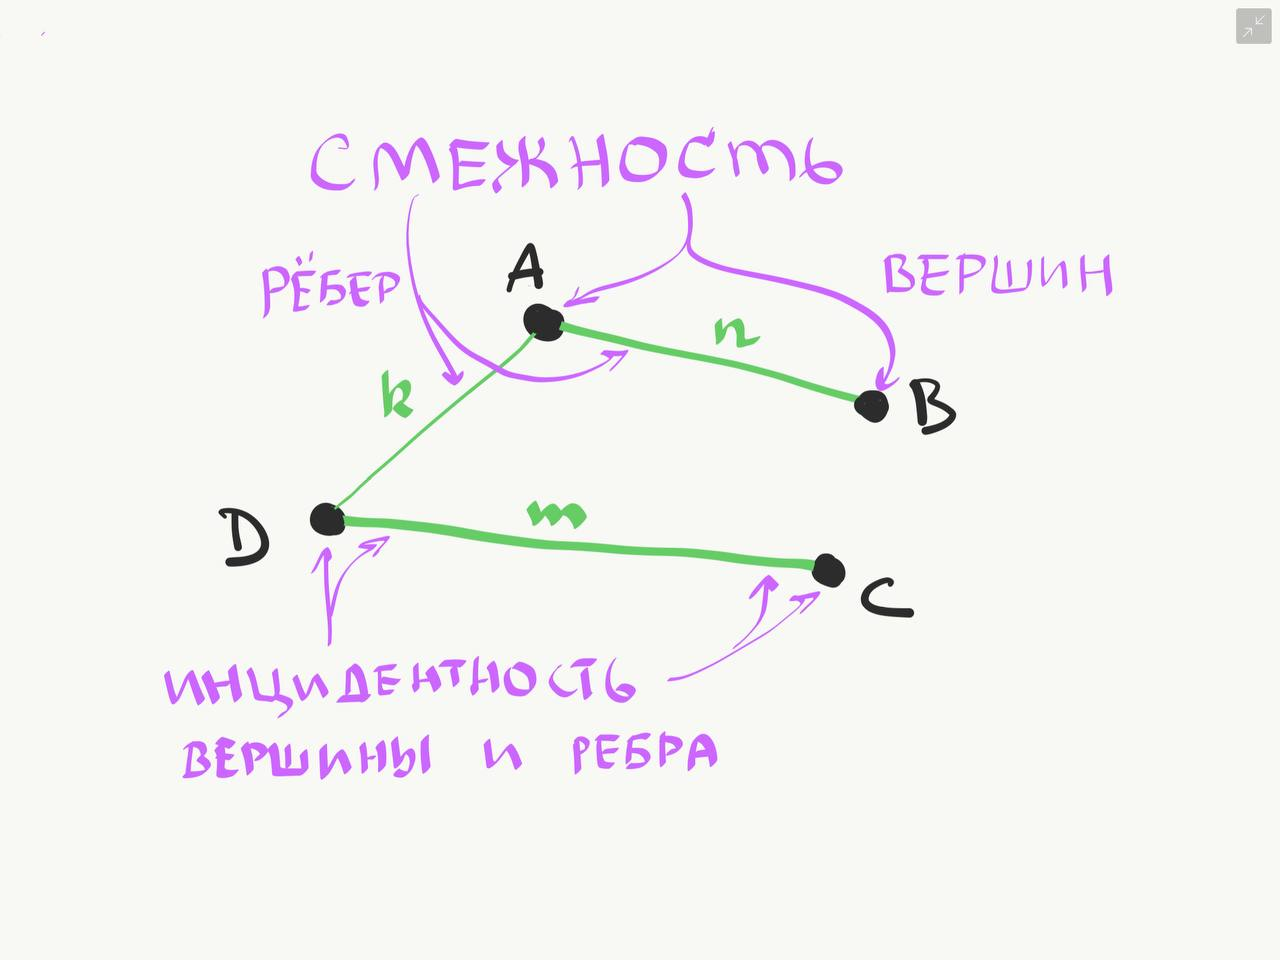

**Петля** - ребро, концы которого совпадают.

**Степень вершины** - это количество рёбер, инцидентных указанной вершине. Петля увеливает степень вершины на 2.

**Изолированная вершина** - вершина с нулевой степенью.

**Висячая вершина** - вершина со степенью 1.

**Кратные рёбра** - рёбра, имеющие одинаковые концевые вершины, по другому их называют ещё параллельными.

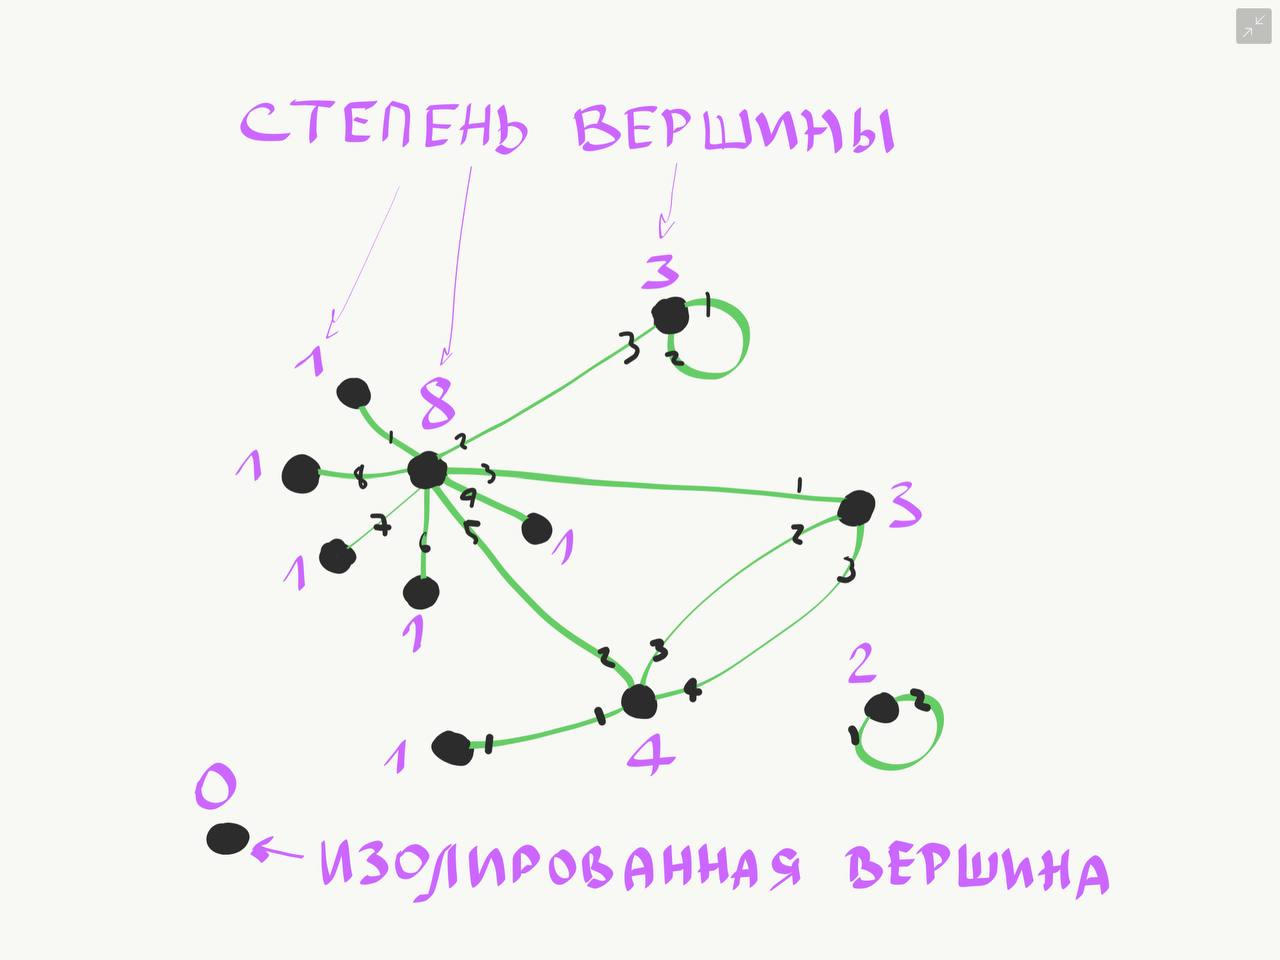

## Способы представления графа
### Матрица смежности

Для хранения рёбер используется двумерная матрица размерности $[V, V]$, каждый $[a, b]$ элемент которой равен 1, если вершины a и b являются смежными и 0 в противном случае.

В случае неориентированного графа матрица является симметричной относительно главной диагонали, а сумма каждой строчки и каждого столбца равна степени вершины. В связи с этим, при записи рёбер-петель в матрицу необходимо записывать число 2.

picture 3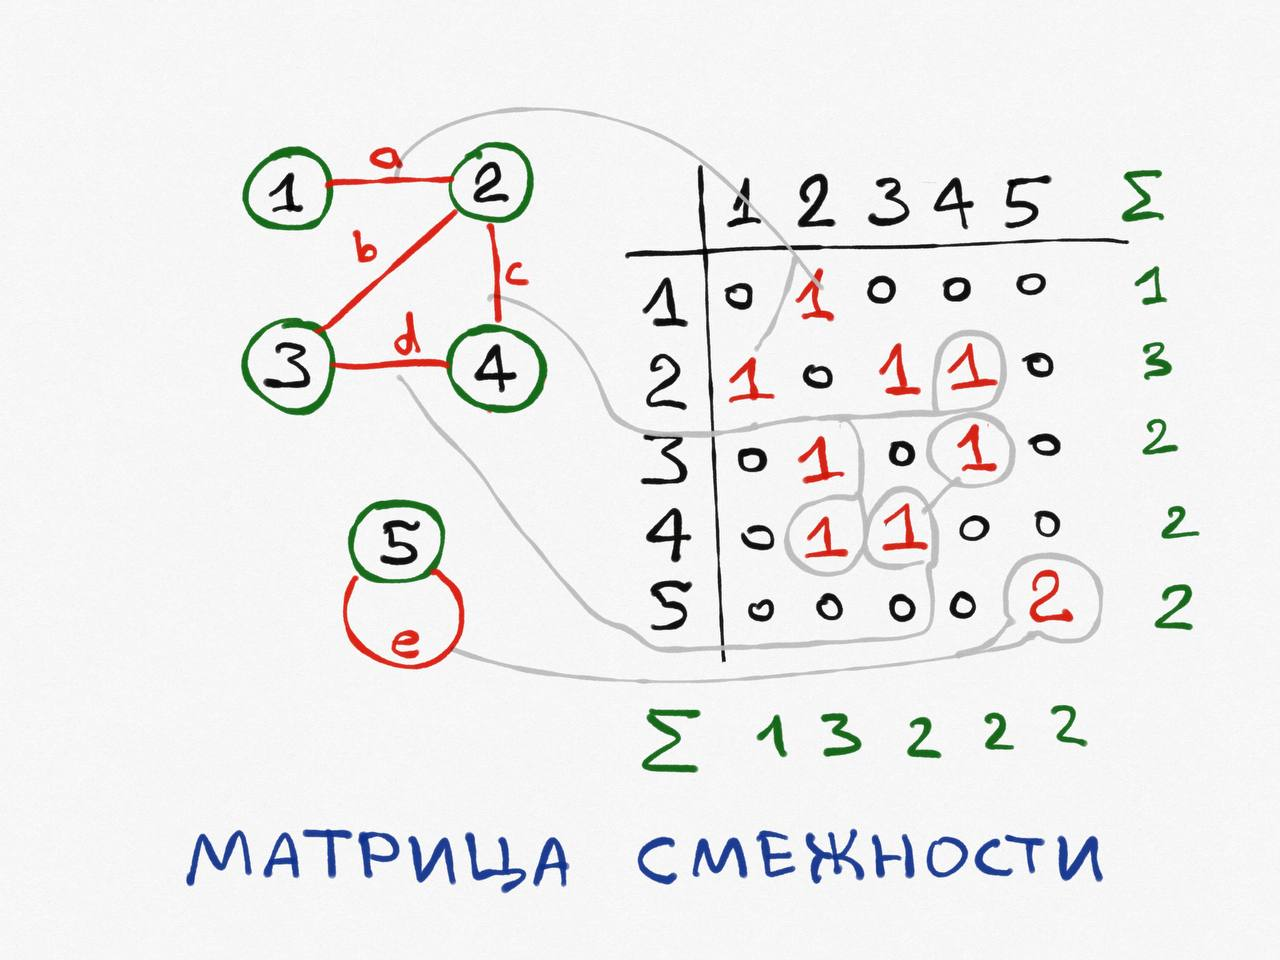

#### Questions
<details>
    <summary>Сложность по памяти:</summary>
&emsp;$O(V^2)$
</details>
<details>
    <summary>Сложность перечисления всех ребер:</summary>
&emsp;$O(V^2)$
</details>
<details>
    <summary>Сложность перечисления всех вершин смежных с $u$:</summary>
&emsp;$O(V)$
</details>
<details>
    <summary>Сложность проверки смежности вершин $u$ и $v$:</summary>
&emsp;$O(1)$
</details>


#### Реализация

In [ ]:
import numpy as np
class AdjacencyGraph:
  def __init__(self):
    self.AdjacencyMatrix = np.zeros((5,5))
    pass

  def addEdge(self, u,v):
    n_max = max(u,v)
    if (self.AdjacencyMatrix.size < n_max):
      np.resize(self.AdjacencyMatrix, (n_max,n_max) )
    self.AdjacencyMatrix[u][v] += 1
    self.AdjacencyMatrix[v][u] += 1

  def addVert(self, u):
    if (self.AdjacencyMatrix.size < u):
      np.resize(self.AdjacencyMatrix, (u,u) )

  def print(self):
    print(self.AdjacencyMatrix)

### Матрица инцидентности

Для хранения используется двумерная матрица размера $[V, E]$, в каждом столбце которой записано одно ребро таким образом: напротив вершин, инцидентных этому ребру, записаны 1, в остальных случаях 0.

Таким образом, сумма чисел в каждом столбце равна 2, а сумма чисел в строчке a равна степени вершины а.

picture 4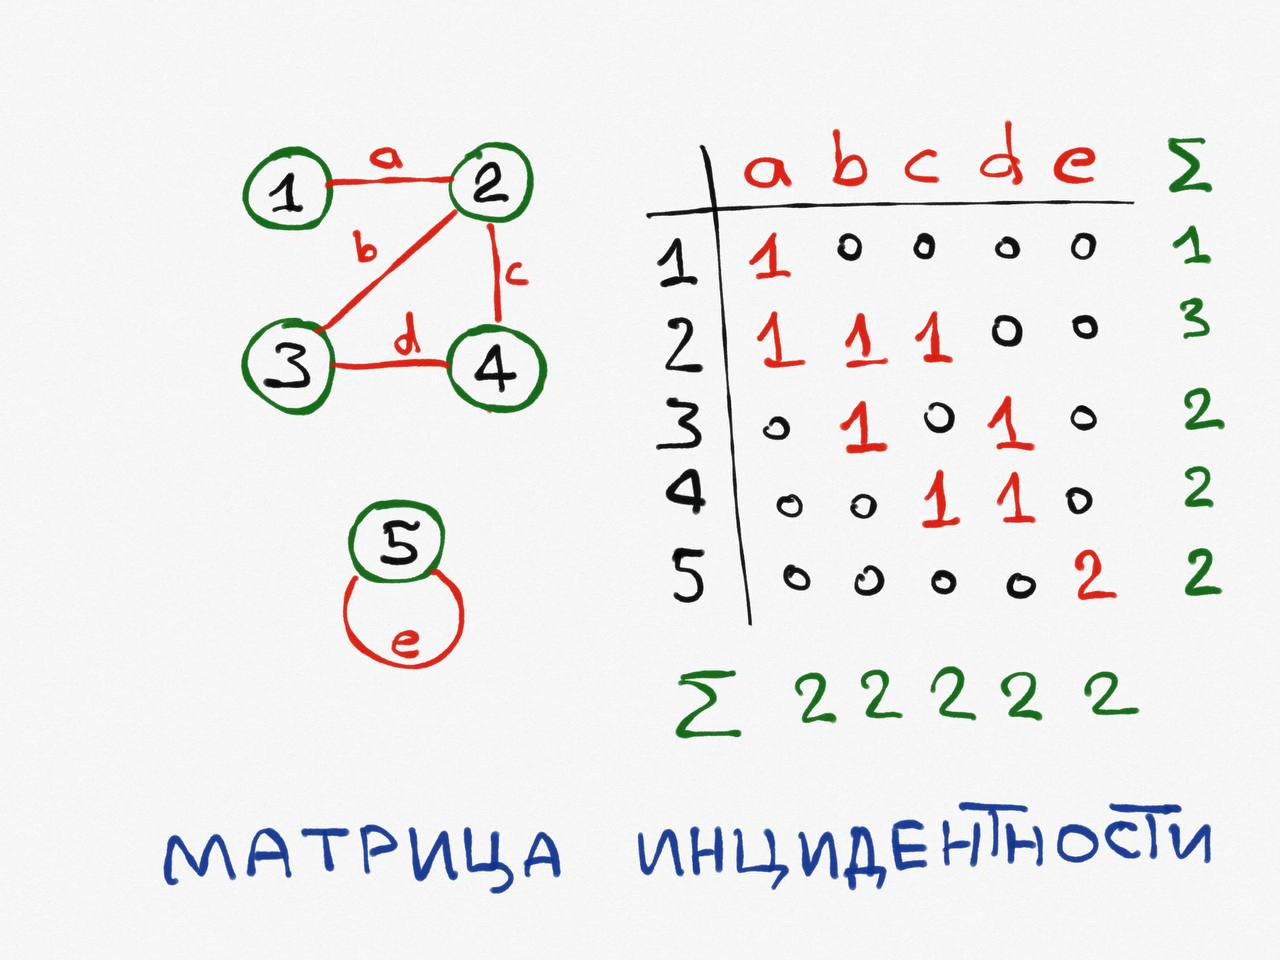

#### Questions
<details>
    <summary>Сложность по памяти:</summary>
&emsp;$ O(V * E)$
</details>
<details>
    <summary>Сложность перечисления всех ребер:</summary>
&emsp;$ O(V * E)$
</details>
<details>
    <summary>Сложность перечисления всех вершин смежных с $u$:</summary>
&emsp;$ O(V * E)$
</details>
<details>
    <summary>Сложность проверки смежности вершин $u$ и $v$:</summary>
&emsp;$ O(E)$
</details>


### Перечень ребер


picture 5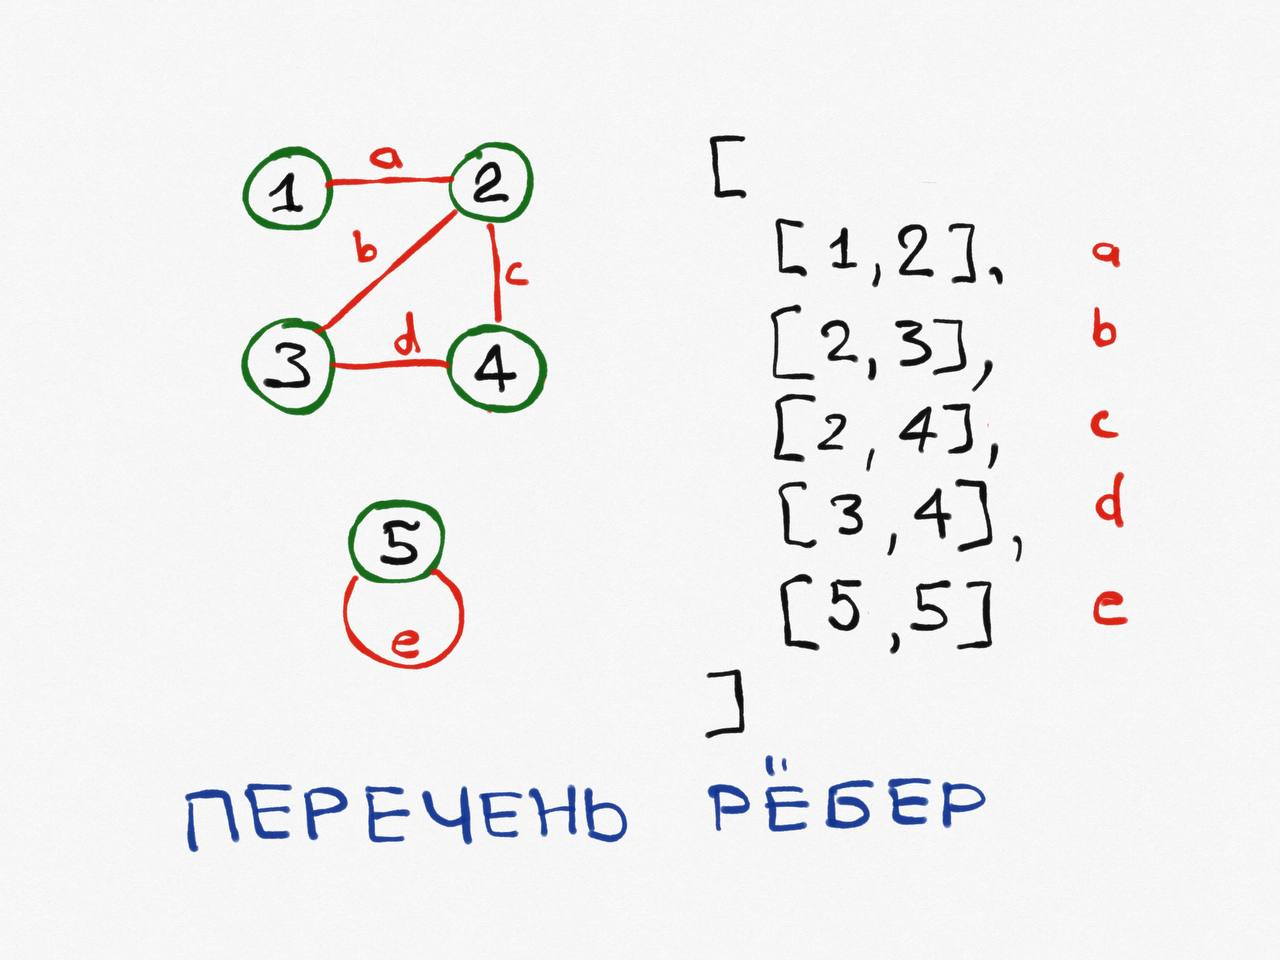

#### Questions
<details>
    <summary>Сложность по памяти:</summary>
&emsp;$ O(E)$
</details>
<details>
    <summary>Сложность перечисления всех ребер:</summary>
&emsp;$ O(E)$
</details>
<details>
    <summary>Сложность перечисления всех вершин смежных с $u$:</summary>
&emsp;$ O(E)$
</details>
<details>
    <summary>Сложность проверки смежности вершин $u$ и $v$:</summary>
&emsp;$ O(E)$
</details>


### Списки смежности



picture 6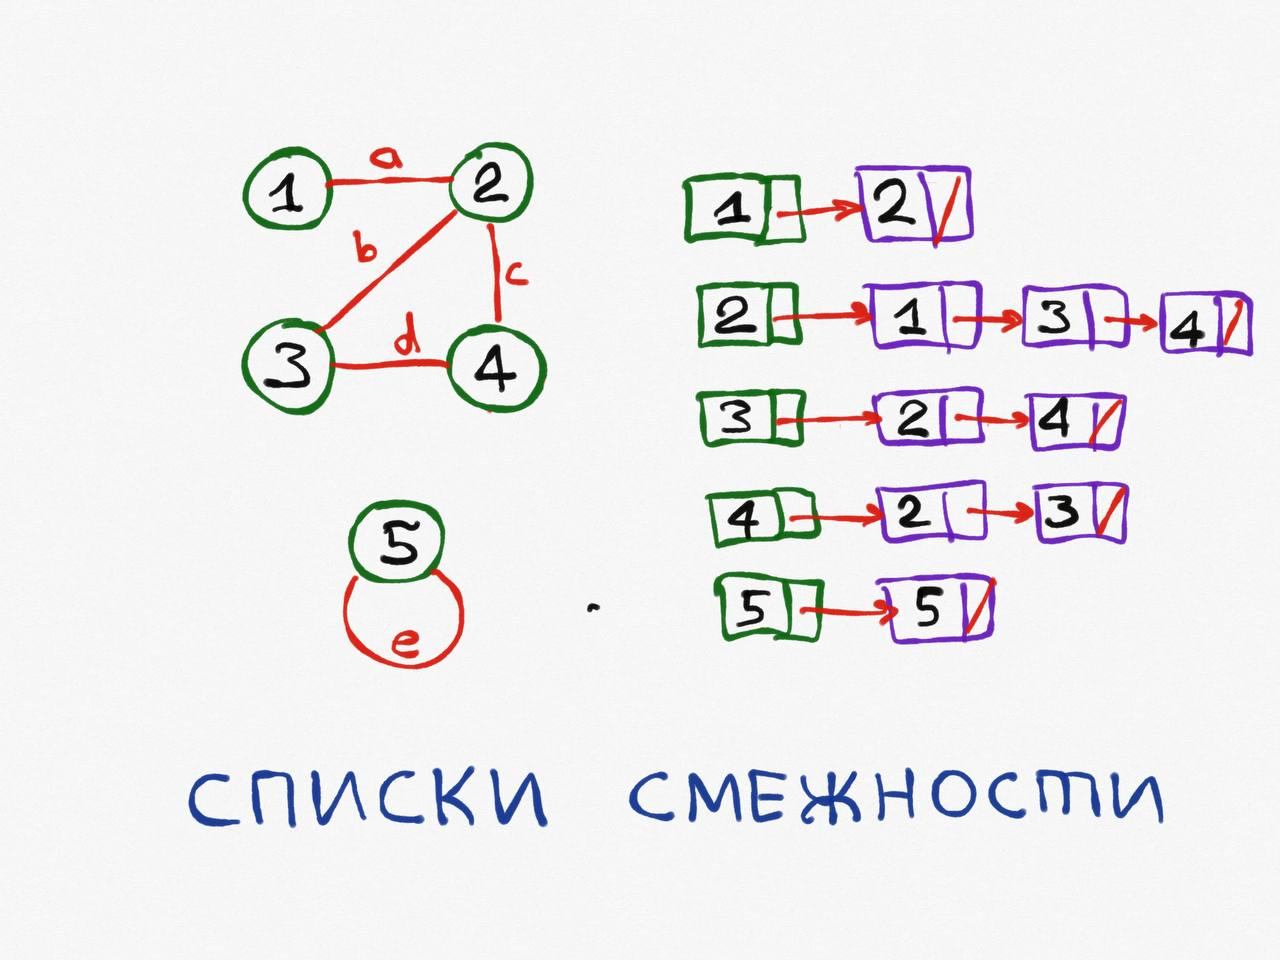

#### Реализация

In [ ]:
import numpy as np
class AdjacencyListGraph:
  def __init__(self):
    self.adjacency_list = []

  def addEdge(self, u,v):
    n_max = max(u,v)
    while (len(self.adjacency_list)< n_max +1):
      self.adjacency_list.append([])
    self.adjacency_list[u].append(v)

  def addVert(self, u):
    if (self.adjacency_list.size < n_max):
      self.adjacency_list.append([])

  def print(self):
    print(self.adjacency_list)

[[], [2], [3, 1], []]


#### Questions
<details>
    <summary>Сложность по памяти:</summary>
&emsp;$ O(V + E)$
</details>
<details>
    <summary>Сложность перечисления всех ребер:</summary>
&emsp;$ O(V + E)$
</details>
<details>
    <summary>Сложность перечисления всех вершин смежных с $u$:</summary>
&emsp;$ O(E)$
</details>
<details>
    <summary>Сложность проверки смежности вершин $u$ и $v$:</summary>
&emsp;$ O(E)$
</details>


###Задачи:

#### hidden code

In [ ]:

edge_list = [(0,2), (1,2), (1,3), (5,3), (3,4), (1,0)]

#### non-hidden code

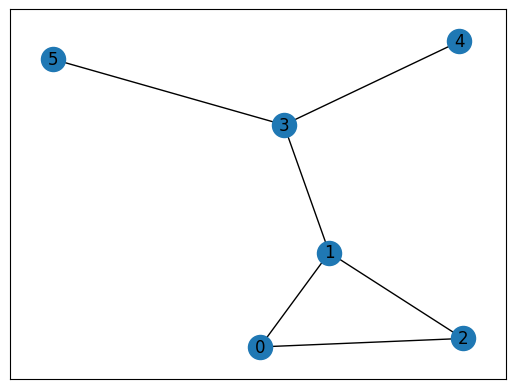

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

# Defining a Class
class GraphVisualization:

    def __init__(self):

        # visual is a list which stores all
        # the set of edges that constitutes a
        # graph
        self.visual = []

    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)

    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()
  # Driver code
G = GraphVisualization()
for u,v in edge_list:
    G.addEdge(u, v)
G.visualize()

#### Задача №1
составить для данного графа:


1.   Матрицу смежности
2.   Список смежности
3.   Матрицу инцидентности



#### Задача №2
**Транспонированный граф**
$$G^{T} = (V,E^{T})$$
где $E^{T} = \{(v,u) \in V \times V: (u,v) \in E\}$


Опишите эффективный алгоритм транспонирования графа для представлений в виде списка смежности и матриц смежности. Оцените его сложность.




